# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

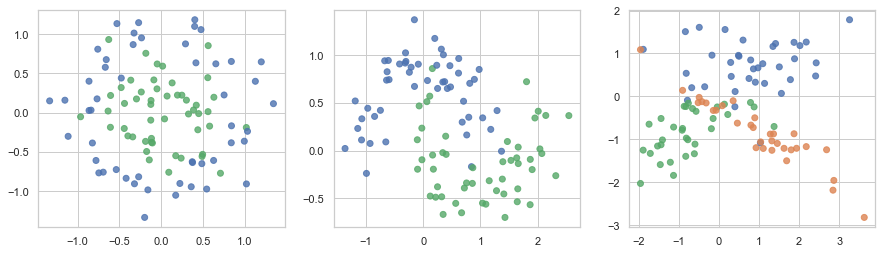

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [6]:
ds = {0:'circles', 1:'moon', 2:'classification'}

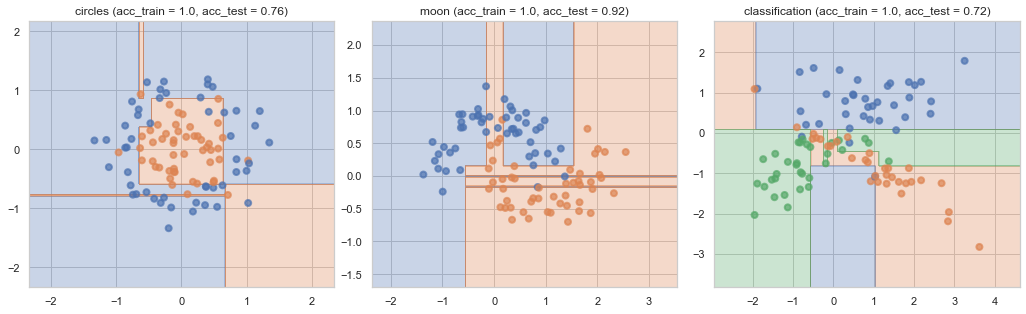

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
    acc_train = accuracy_score(y_train, clf.predict(X_train))
    acc_test = accuracy_score(y_test, clf.predict(X_test))
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X, y)
    plt.title(str(ds[i]) + ' (acc_train = ' + str(acc_train) + ', acc_test = ' + str(acc_test) + ')')

__Ответ:__ Да, довольно сильно, так как на картинках очень много тонких полосок

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

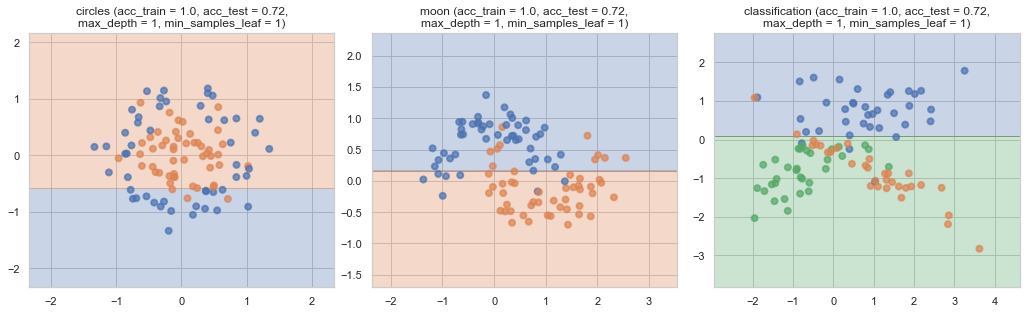

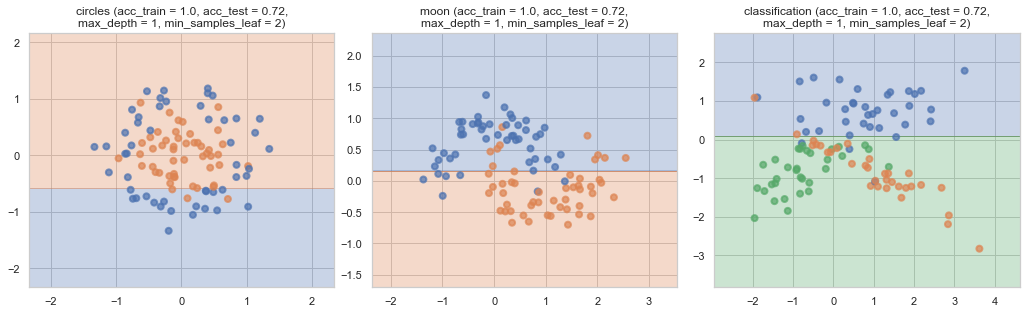

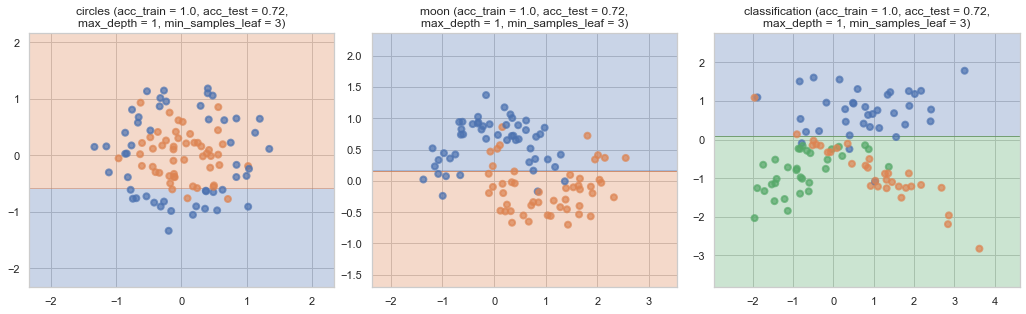

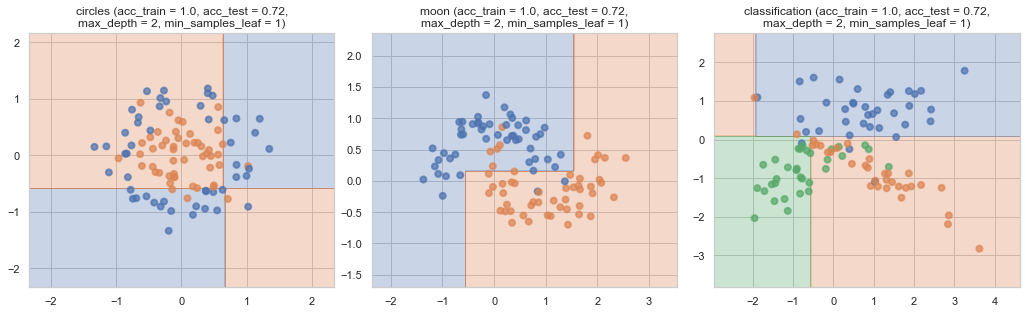

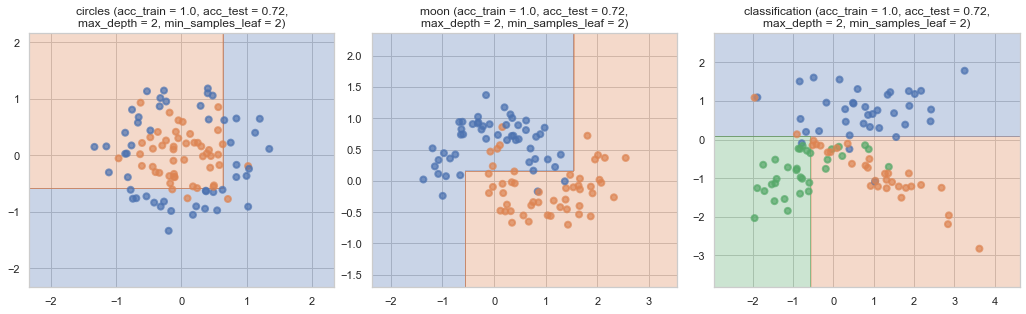

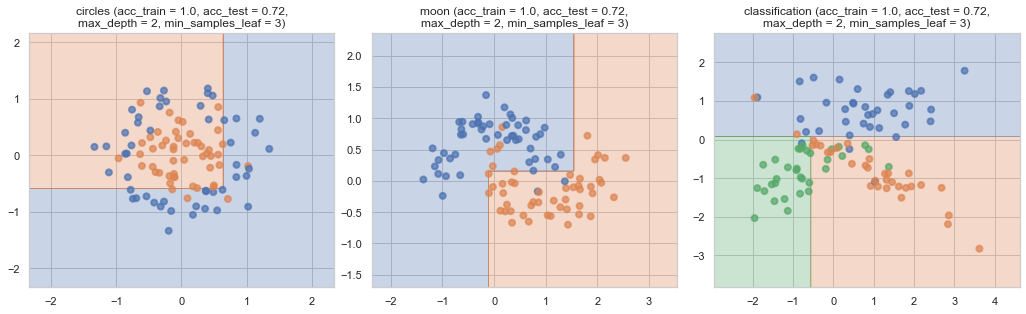

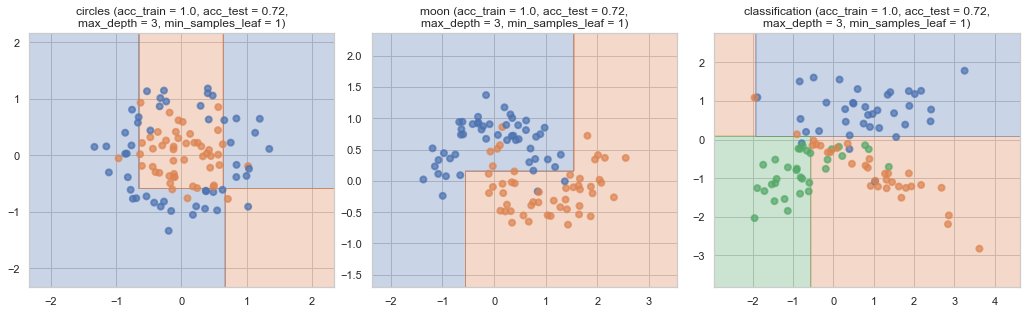

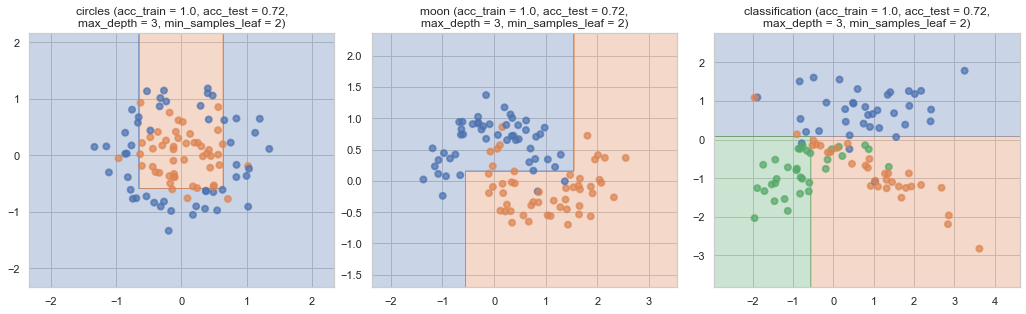

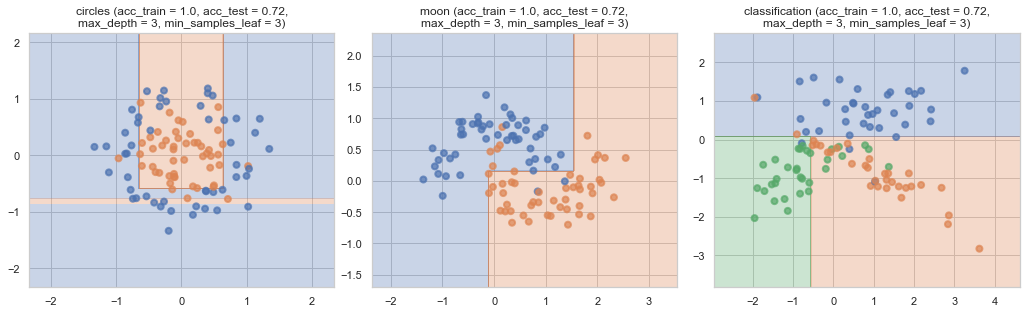

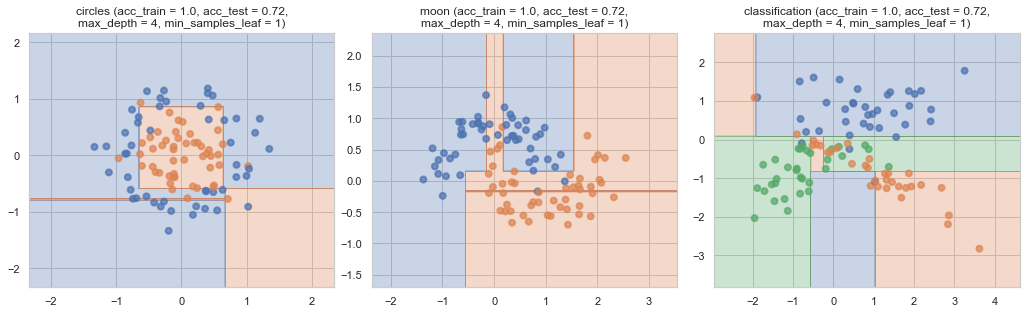

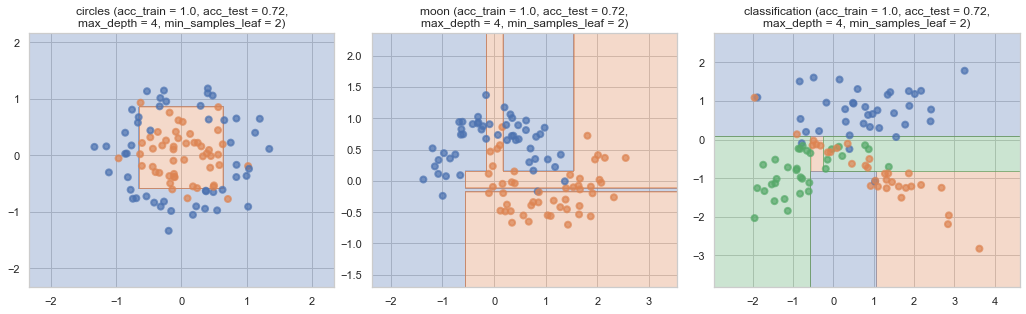

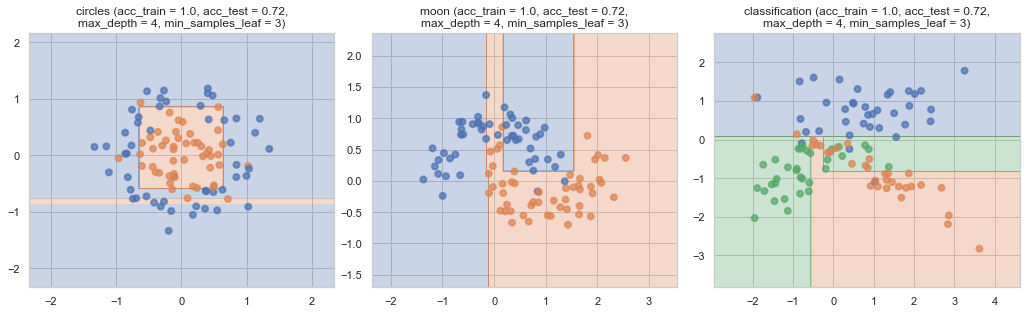

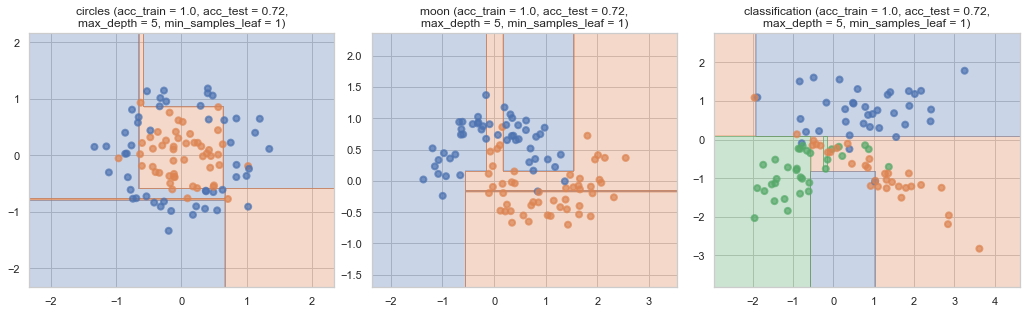

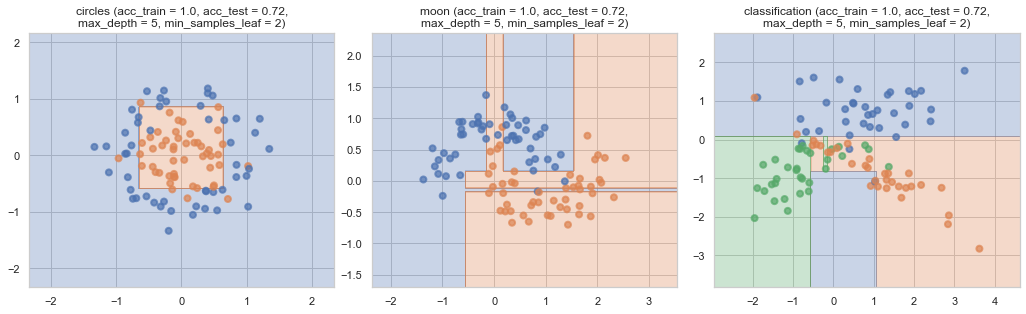

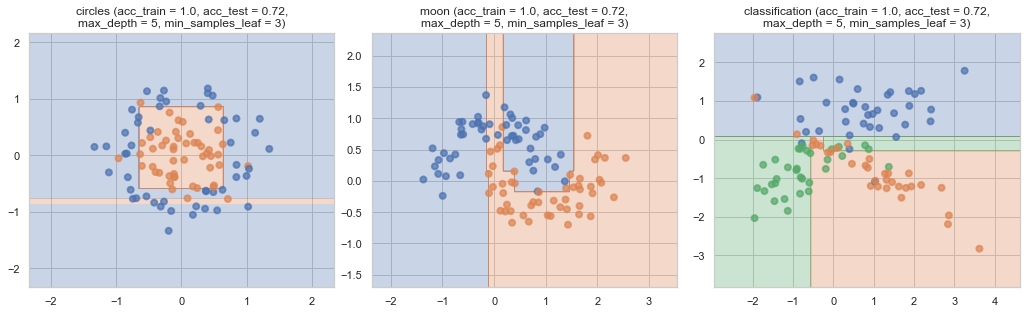

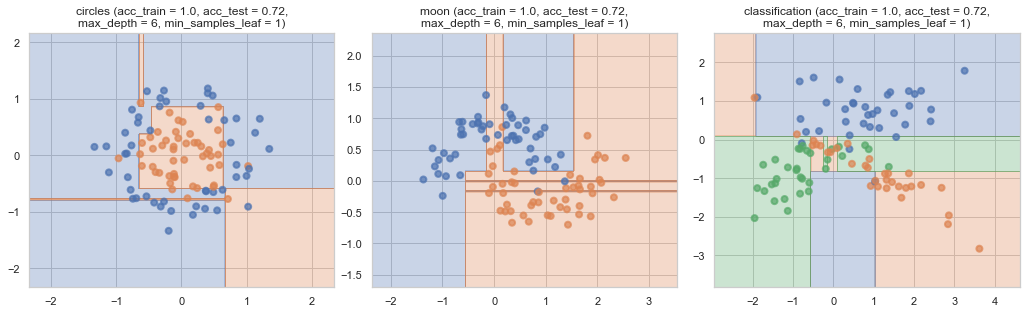

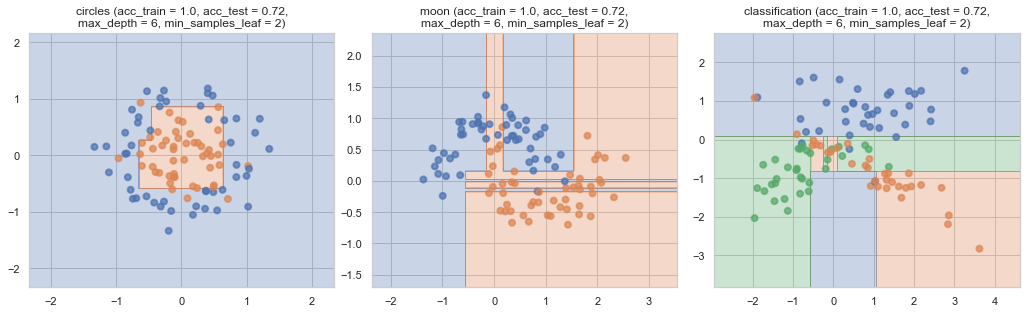

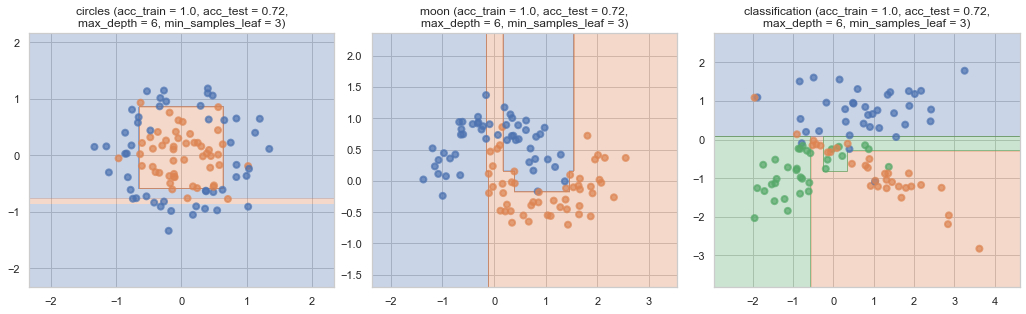

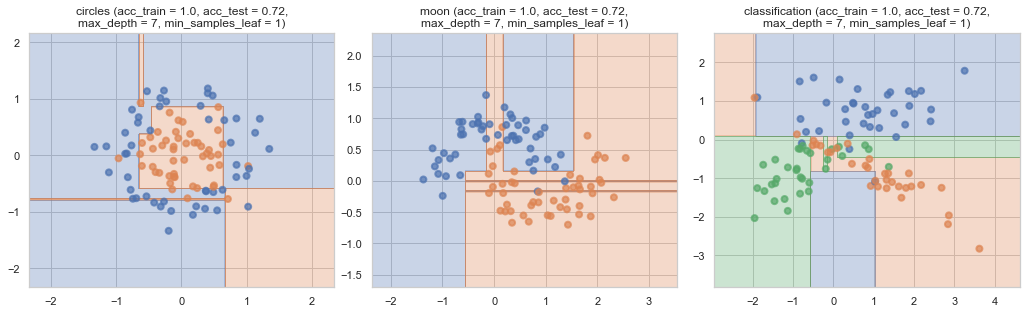

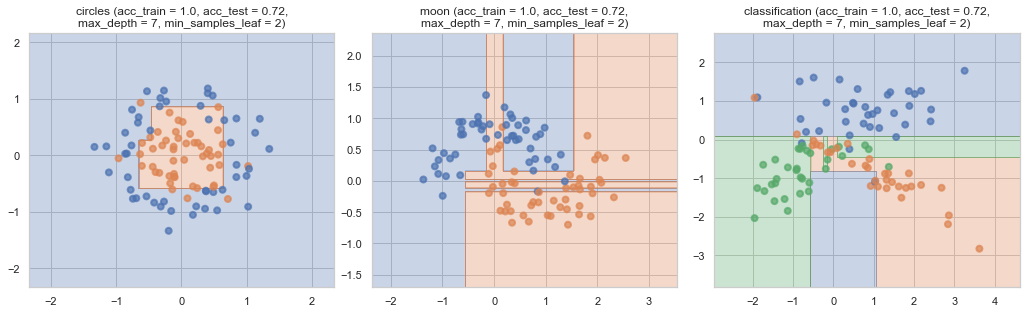

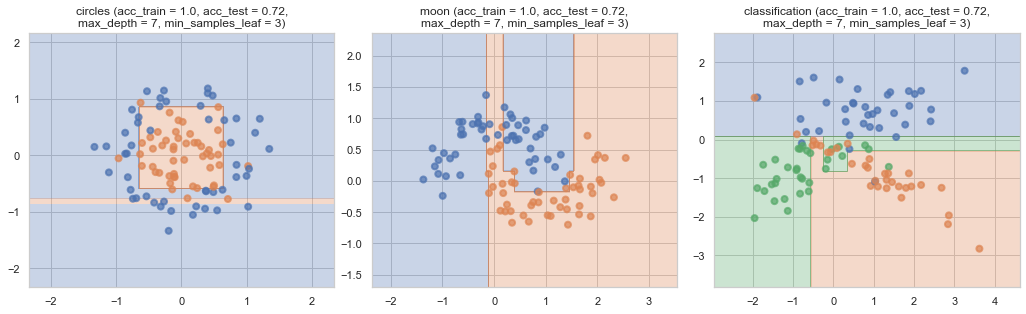

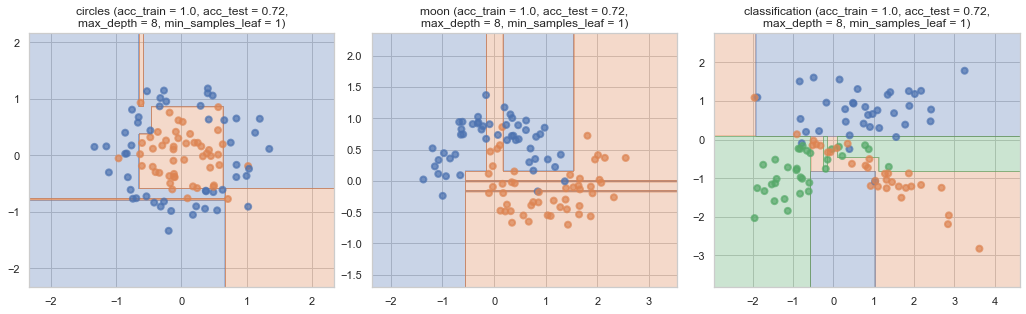

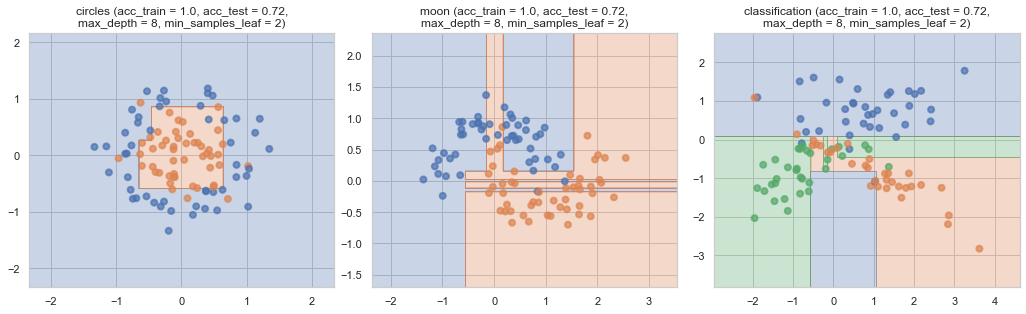

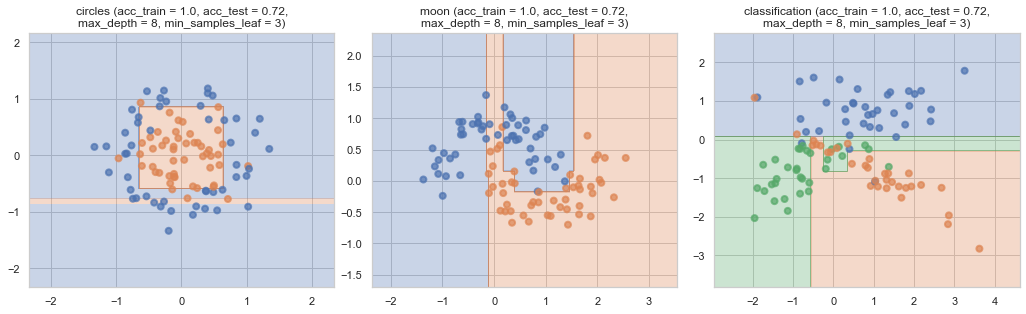

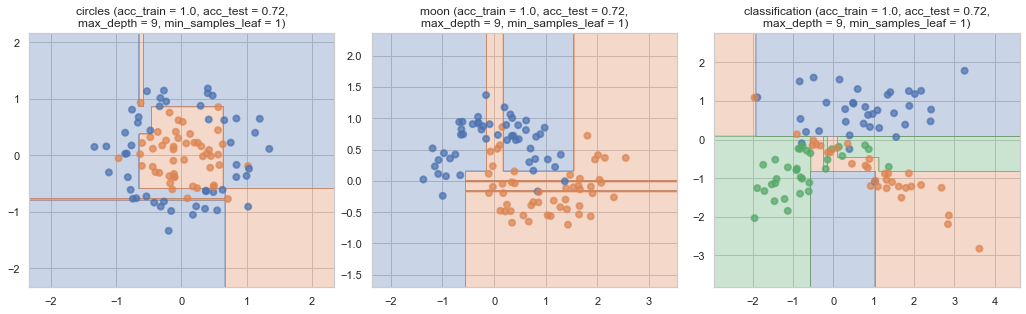

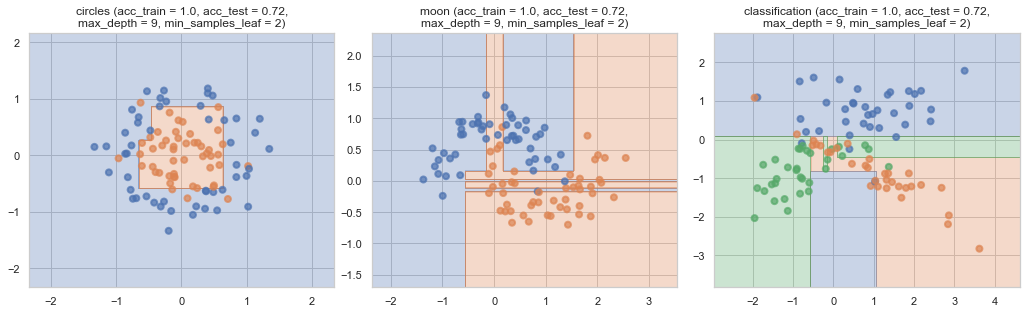

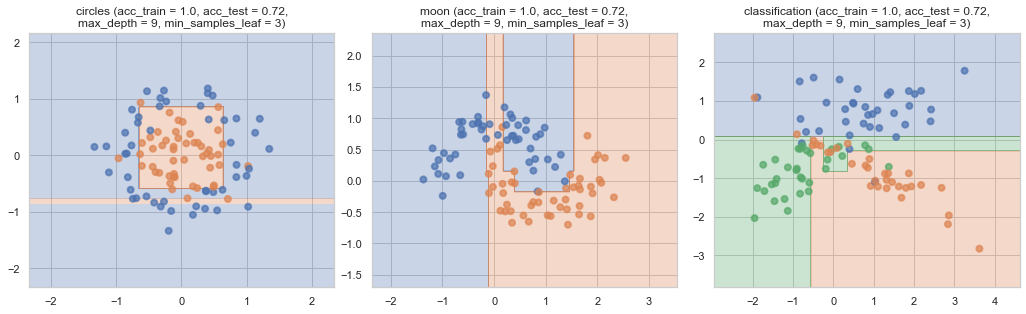

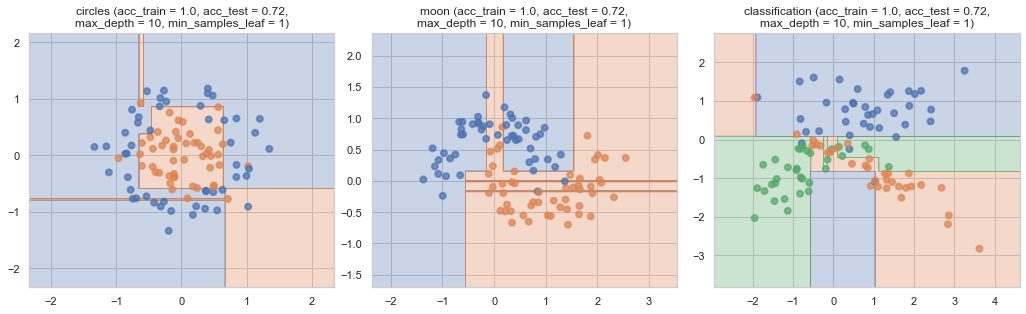

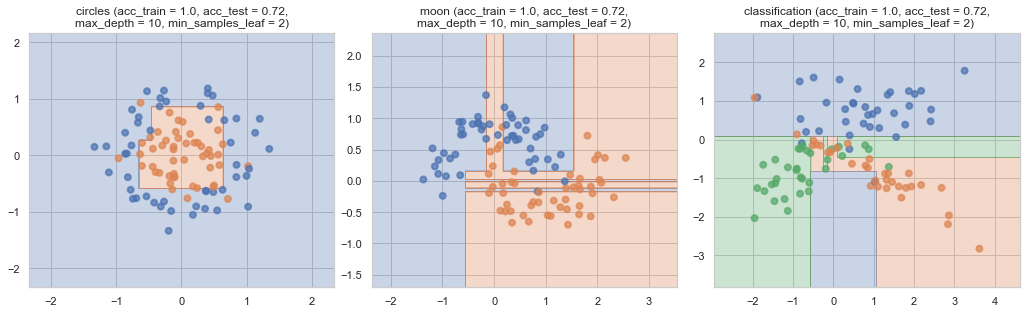

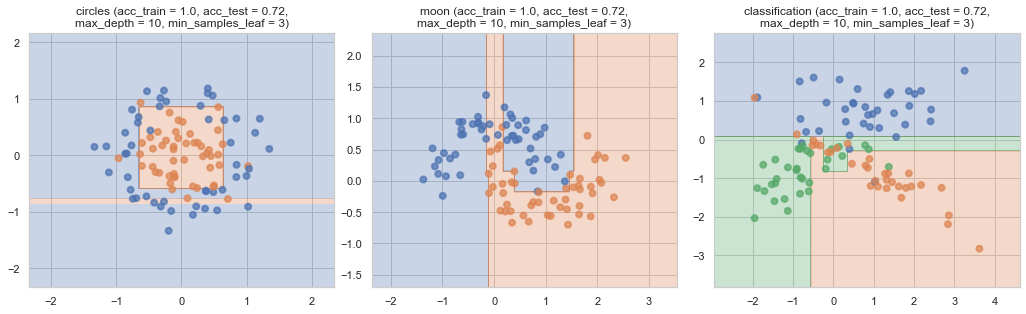

In [8]:
for max_depth in range(1, 11):
    for min_samples_leaf in range(1, 4):
        plt.figure(figsize=(15, 5))
        for i, (X, y) in enumerate(datasets):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
            clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, 
                                         random_state=42).fit(X_train, y_train)
            plt.subplot(1, 3, i + 1)
            plot_surface(clf, X, y)
            plt.title(str(ds[i]) + ' (acc_train = ' + str(acc_train) + ', acc_test = ' + str(acc_test) +
                      ',\nmax_depth = ' + str(max_depth) + ', min_samples_leaf = ' +
                      str(min_samples_leaf) + ')')

__Ответ:__ Для датасета circles начиная с глубины 4 картинка получается примерно одинаковой (желательно использовать количество листов >=2), в целом понятно, почему глубина именно 4 (квадрат неплохо описывает такое распределение точек, у квадрата как раз 4 стороны, что соответствует глубине 4)

Для датасета moon хороший результат получается начиная с глубины 4-5 при количестве листов 3. Логика на самом деле та же. Единственное замечаение, что модель так и не заметила синие точки посередине синего месяца и по итогу результат не лучший.

Для датасета classification уже модель с глубиной 2 и количеством листов 1 дает неплохой результат. Конечно, так как в распределении присутствует место, где намешаны различные точки, любому дереву будет очень тяжело нормально их отделить друг от друга, поэтому уже самое простое дерево показывает результат, не сильно отличный от деревьев с бОльшей глубиной

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
df = pd.read_csv('students.csv', sep=',')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


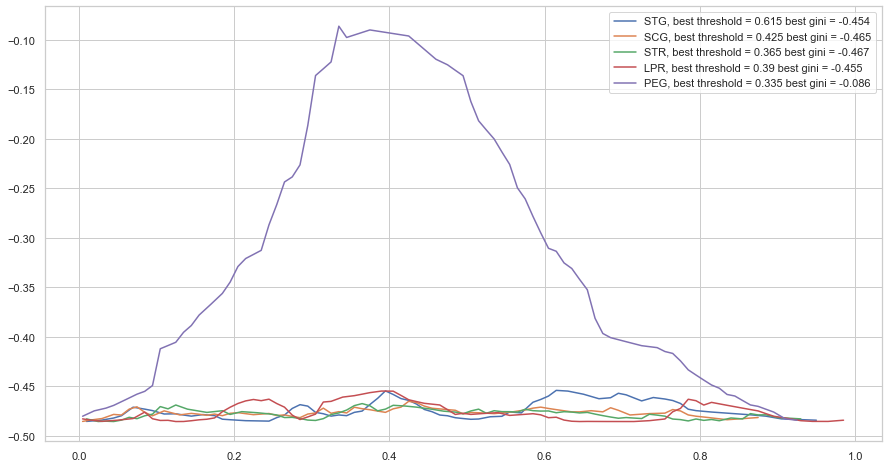

In [10]:
import importlib
import hw5code as Tree
_ = importlib.reload(Tree)

X = df.drop(columns = ' UNS')
y = df[' UNS']

plt.figure(figsize = (15, 8))
for col in X.columns:
    thresholds, ginis, best_threshold, best_gini =  Tree.find_best_split(X[col], y)
    best_gini = np.round(best_gini, 3)
    plt.plot(thresholds, ginis, label = col + ', best threshold = ' + str(best_threshold) + ' best gini = '+ str(best_gini))
plt.legend()
plt.show()

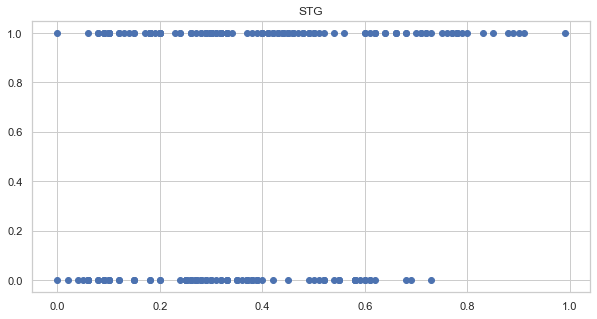

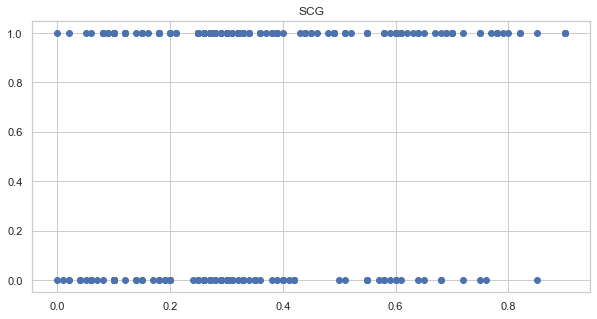

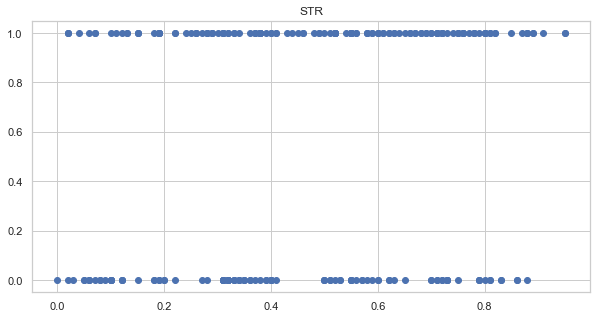

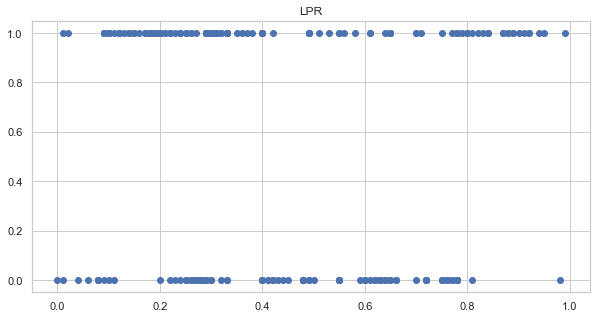

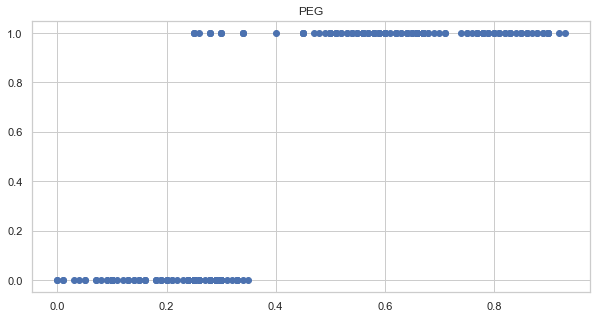

In [11]:
for col in X.columns:
    plt.figure(figsize = (10, 5))
    plt.scatter(X[col], y)
    plt.title(col)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Надо производить деление выборки по признаку PEG. Согласуется, надо смотреть на количество максимумов и общую гладкость кривой. У хорошего признака скорее всего будет один ярковыраженный максимум. В то же время у плохих признаков зависимость критерия Джини от порога имеет много максимумов, графики у таких признаков достаточно шумные, флуктуативные. Характерное изменение критерия Джини с изменением порога у плохих признаков мало (то есть он слабо зависит от выбранного порога). Обратная ситуация с хорошим призанком PEG, на нем характерное изменение велико

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [12]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                        header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

X = mushrooms.drop(columns=[0])
y = LabelEncoder().fit_transform(mushrooms[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51261)

le = LabelEncoder()
for col in X_train.columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

tree = Tree.DecisionTree(X.shape[1] * ['categorical'])
tree.fit(X_train, y_train)
print('acc: ', accuracy_score(y_test, tree.predict(X_test)))

acc:  0.999015263417036


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [14]:
tic_tac_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', 
                        header=None)
tic_tac_toe.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [15]:
X = tic_tac_toe.drop(columns = [9])
y = LabelEncoder().fit_transform(tic_tac_toe[9])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

le = LabelEncoder()
for col in X_train.columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

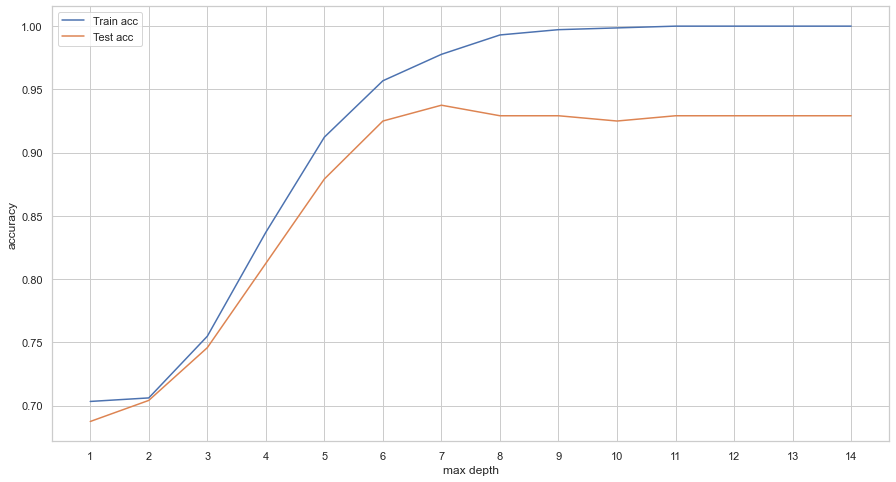

In [16]:
max_depth = np.arange(1, 15)
train_acc = np.empty(max_depth.shape[0])
test_acc = np.empty(max_depth.shape[0])
i = 0
for cur_max_depth in max_depth:
    tree = Tree.DecisionTree(X.shape[1] * ['categorical'], max_depth = cur_max_depth)
    tree.fit(X_train, y_train)
    train_acc[i] = accuracy_score(y_train, tree.predict(X_train))
    test_acc[i] = accuracy_score(y_test, tree.predict(X_test))
    i += 1 
plt.figure(figsize=(15, 8))
plt.plot(max_depth, train_acc, label = 'Train acc')
plt.plot(max_depth, test_acc, label = 'Test acc')
plt.legend()
plt.xticks(max_depth)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

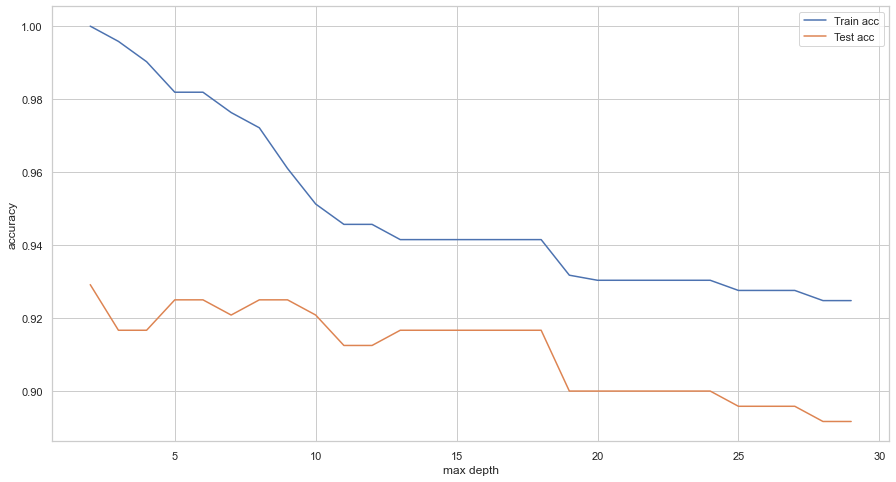

In [17]:
min_samples_split = np.arange(2, 30)
train_acc = np.empty(min_samples_split.shape[0])
test_acc = np.empty(min_samples_split.shape[0])
i = 0
for cur_min_samples_split in min_samples_split:
    tree = Tree.DecisionTree(X.shape[1] * ['categorical'], min_samples_split = cur_min_samples_split)
    tree.fit(X_train, y_train)
    train_acc[i] = accuracy_score(y_train, tree.predict(X_train))
    test_acc[i] = accuracy_score(y_test, tree.predict(X_test))
    i += 1 
plt.figure(figsize=(15, 8))
plt.plot(min_samples_split, train_acc, label = 'Train acc')
plt.plot(min_samples_split, test_acc, label = 'Test acc')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
def Trees(X, y):
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)
    X_le = pd.DataFrame()
    X_ohe = pd.DataFrame()
    for col in X.columns:
        X_le[col] = le.fit_transform(X[col])
    X_ohe = ohe.fit_transform(X)
    le_real = np.mean(
        cross_val_score(Tree.DecisionTree(X_le.shape[1] * ['real']), X_le, y, scoring = 'accuracy', cv=10, n_jobs=-1))
    le_categ = np.mean(cross_val_score(Tree.DecisionTree(['categorical'] * X_le.shape[1]), X_le, y, 
                                    scoring = 'accuracy', cv=10, n_jobs=-1))
    ohe_real = np.mean(cross_val_score(Tree.DecisionTree(["real"] * X_ohe.shape[1]), X_ohe, y,
                                     scoring="accuracy", cv=10, n_jobs=-1))
    le_sklearn = np.mean(cross_val_score(DecisionTreeClassifier(), X_le, y, scoring="accuracy", cv=10, n_jobs=-1))
    return le_real, le_categ, ohe_real, le_sklearn

In [19]:
Metrics = pd.DataFrame(columns = ['real', 'categorical', 'ohe', 'sklearn'], 
                       index = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery'])

In [20]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
cars_replace = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)
nursery_replace = {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
nursery.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [22]:
X = mushrooms.drop(columns=[0])
y = LabelEncoder().fit_transform(mushrooms[0])
Metrics.loc['mushrooms'] = Trees(X, y)

X = tic_tac_toe.drop(columns=[9])
y = LabelEncoder().fit_transform(tic_tac_toe[9])
Metrics.loc['tic-tac-toe'] = Trees(X, y)

X = cars.drop(columns=[6])
cars = cars.replace({6: cars_replace})
y = cars[6]
Metrics.loc['cars'] = Trees(X, y)

X = nursery.drop(columns=[8])
nursery = nursery.replace({8: nursery_replace})
y = nursery[8]
Metrics.loc['nursery'] = Trees(X, y)

In [23]:
Metrics

,real,categorical,ohe,sklearn
mushrooms,0.999261,1,0.999631,0.961123
tic-tac-toe,0.470691,0.541458,0.543575,0.787325
cars,0.93974,0.967546,0.919495,0.943285
nursery,0.999691,0.999846,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Алгоритмы для разных наборов данных ранжируются не одинаково. Датасеты mushrooms, cars и nursery получились лучше на самописном дереве. С датасетом tic-tac-toe гораздо лучше остальных справилось дерево из sklearn. Как мы знаем, деревья и так очень неустойчивы к изменению выборки, что уж тут говорить о разных датасетах, поэтому такое различие между различными наборами данных было ожидаемо.

Что касается значения признаков, то, пожалуй, могу предложить идею для трансформации признаков датасета tic-tac-toe, в самом датасете присутсвуют только информация о состоянии отдельных клеточек поля. Можно попробовать, учитывать взаимное местонахождение крестиков и ноликов (например, два нолика в ряд лучше чем нолик в позиции 2 и 9 (см.описание датасета)), для того чтобы помочь деревьям определелить таргет.
В целом подобные трансформаторы можно придумать и для остальных датасетов, чтобы дать деревьям признаки, лучше кореллирующие с таргетом, чем признаки, представленные в исходном датасете

Вставьте что угодно, описывающее ваши впечатления от этого задания:

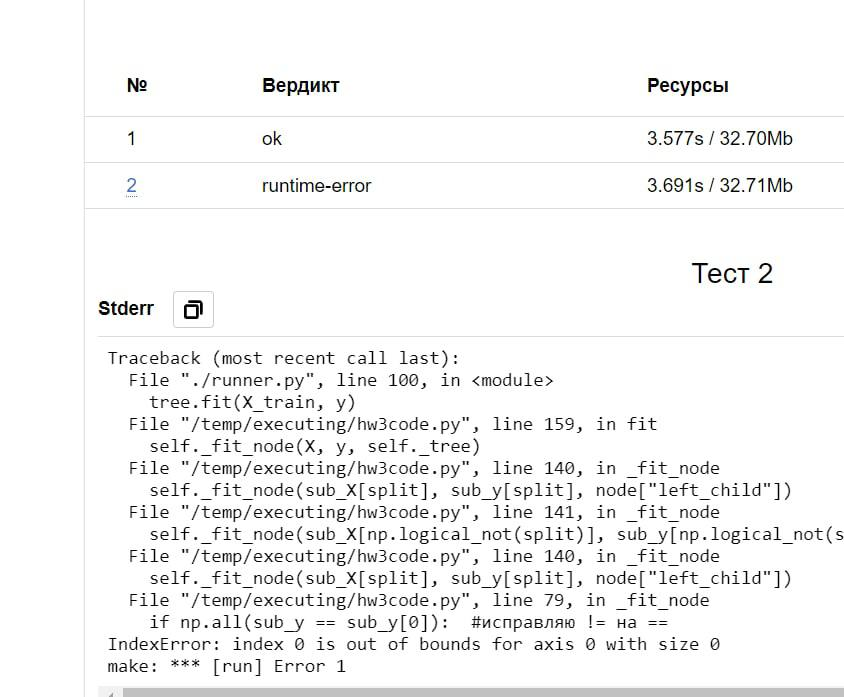
Вот эта ошибка стоила мне суток жизни. Дело было в том, что я не подумал о том, что np.nan != np.nan